In [32]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

plt.style.use('seaborn-whitegrid')

/tmp/ipykernel_3966377/477056521.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [4]:
path = os.path.join("grad_results/mnist_monolithic_numtrain_64_contrastive/mnist/monolithic/seed_0/agent_0",
                    "sharing_record.csv")
df = pd.read_csv(path)
df.head()

,task_id,communication_round,components.0.weight,components.0.bias,components.1.weight,components.1.bias,components.2.weight,components.2.bias,components.3.weight,components.3.bias,avg_params
0,0,0,0.045474,0.023312,0.037357,0.020923,0.022606,0.013185,0.016125,0.015234,0.024277
1,0,10,0.008387,0.008063,0.008201,0.008744,0.004743,0.005562,0.003374,0.004130,0.006401
2,0,20,0.006989,0.007369,0.006925,0.007308,0.004149,0.004796,0.002836,0.003465,0.005480
3,0,30,0.006215,0.006402,0.006128,0.006514,0.003837,0.004157,0.002549,0.003266,0.004884
4,0,40,0.005741,0.006207,0.005762,0.006110,0.003529,0.003788,0.002242,0.002811,0.004523


In [5]:
max_comm_round = df["communication_round"].max() + 1
df["time"] = df["task_id"] * max_comm_round + df["communication_round"]

In [47]:
def get_magma_colors(total_elements):
    start = 0.2
    stop = 0.8
    cm_subsection = np.linspace(start, stop, total_elements)
    return [matplotlib.cm.plasma(x) for x in cm_subsection]

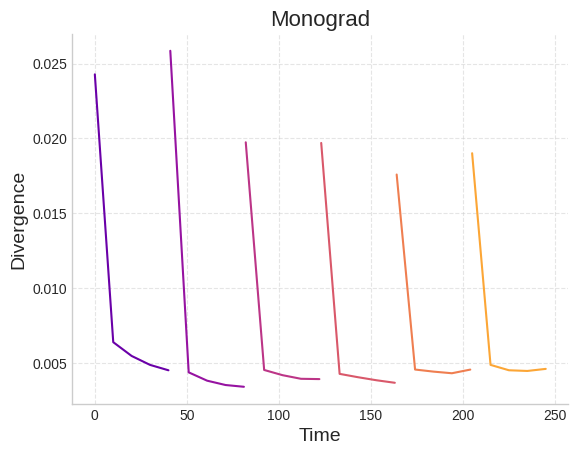

In [48]:
# Create a plot with colored and labeled data points
fig, ax = plt.subplots()

# Define the colormap
# cmap = plt.get_cmap('tab10')
# cmap = plt.get_cmap('viridis')

num_colors = len(df['task_id'].unique())
# colors = cmap(np.linspace(0, 1, num_colors))
colors = get_magma_colors(num_colors)

for i, (task_id, group) in enumerate(df.groupby('task_id')):
        line = group.plot(x='time', y='avg_params', ax=ax,
        label=i,
        color=colors[i],
       )


ax.get_legend().remove()
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Divergence", fontsize=14)
ax.set_title("Monograd", fontsize=16)
ax.grid(True, which='major', linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()